## What are Embeddings?
- Concept from Natural Language Processing (NLP)
- Numerical representation of text
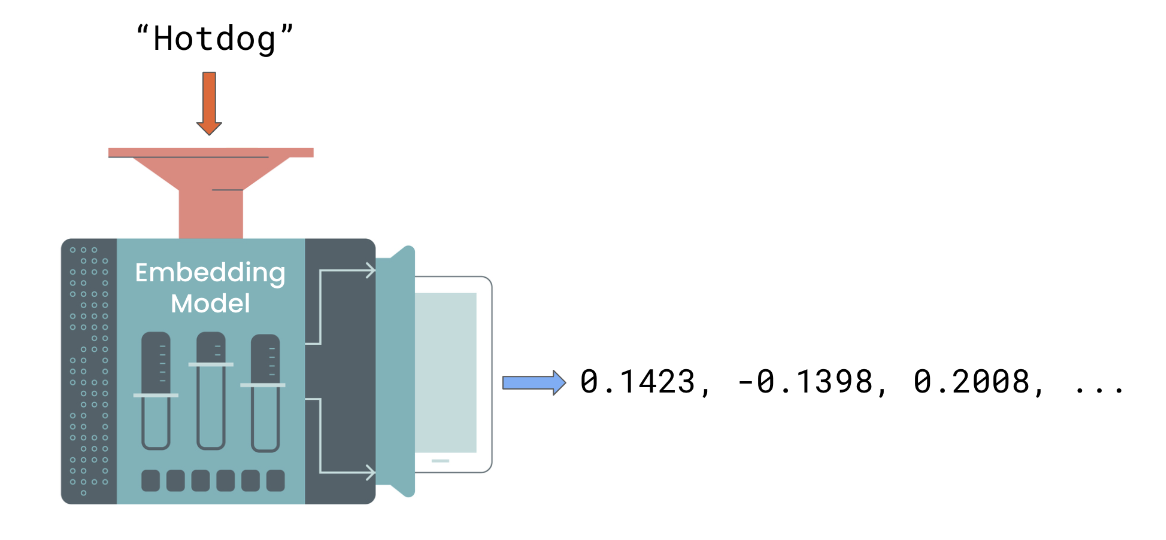

- Text is mapped onto a *multi-dimensional* **vector space**
- The numbers outputted by the model are the text's location in the space
- Similar words appear *closer together*
- Dissimilar words appear *further away*
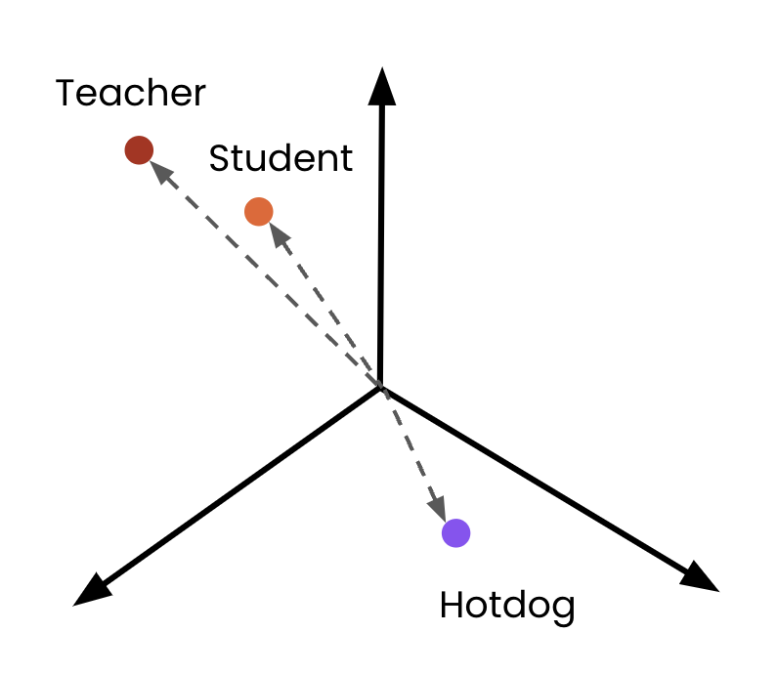

### Why are embeddings useful?
- Embeddings allow *semantic meaning* to be captured
- **Semantic meaning**: context and intent behind text
- Example:
  - "Which way is it to the supermarket?"
  - "Could I have directions to the shop?"

### Semantic search engines
Traditional search engines
- Use **keyword** pattern matching
- May miss the true intent
- Will miss word variations
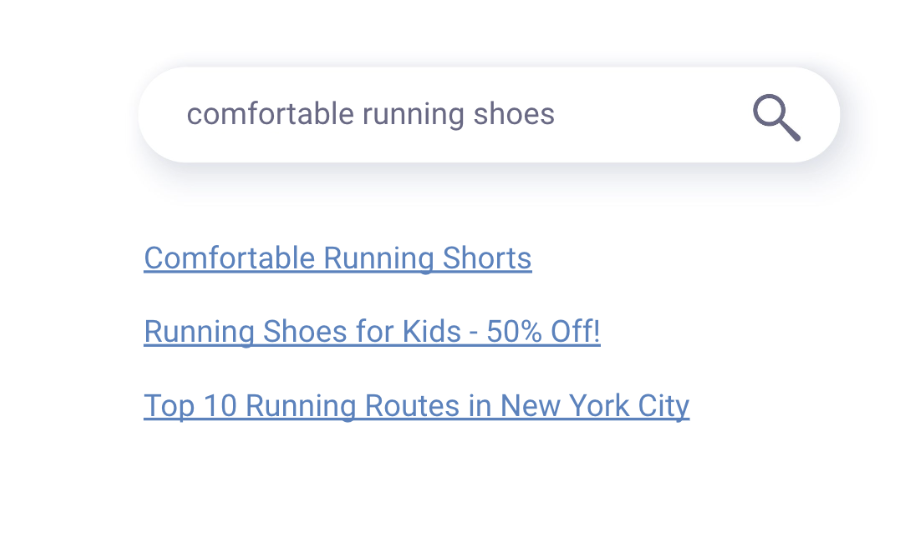

- Use **embeddings** to understand intent and context
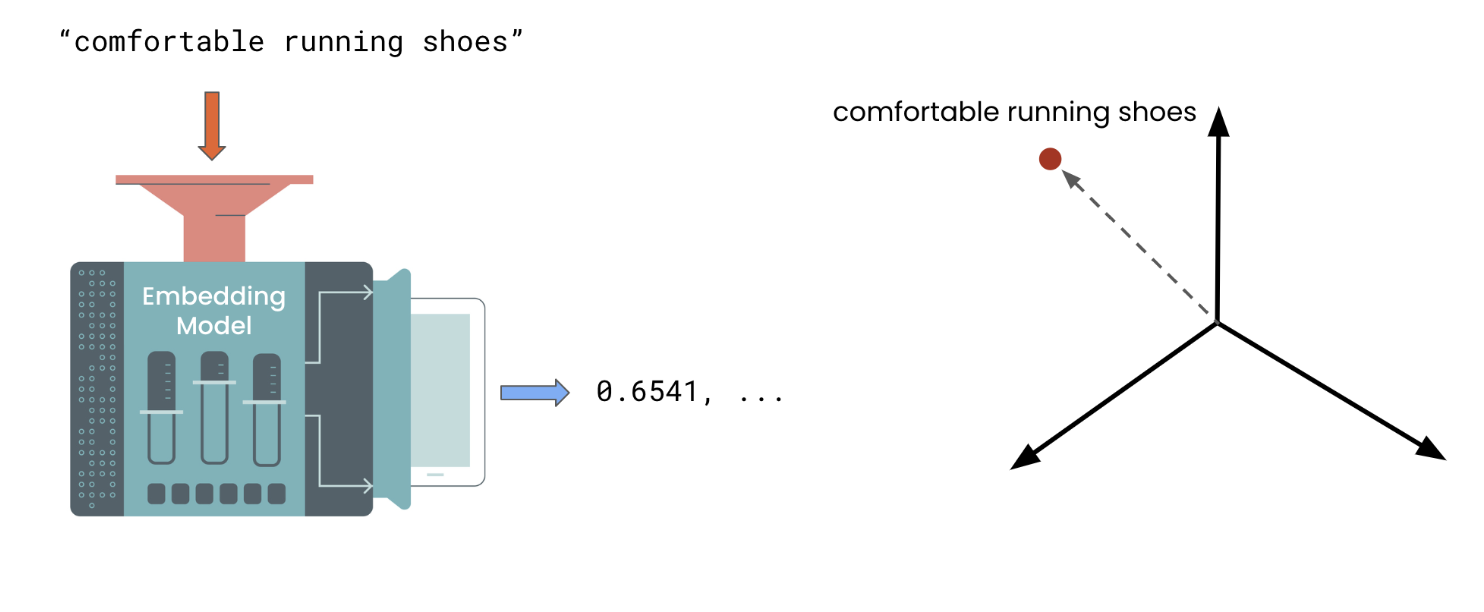

### Recommendation systems
Example: Job post recommendations
- Recommend jobs based on descriptions already viewed
- Mitigates variations in job title
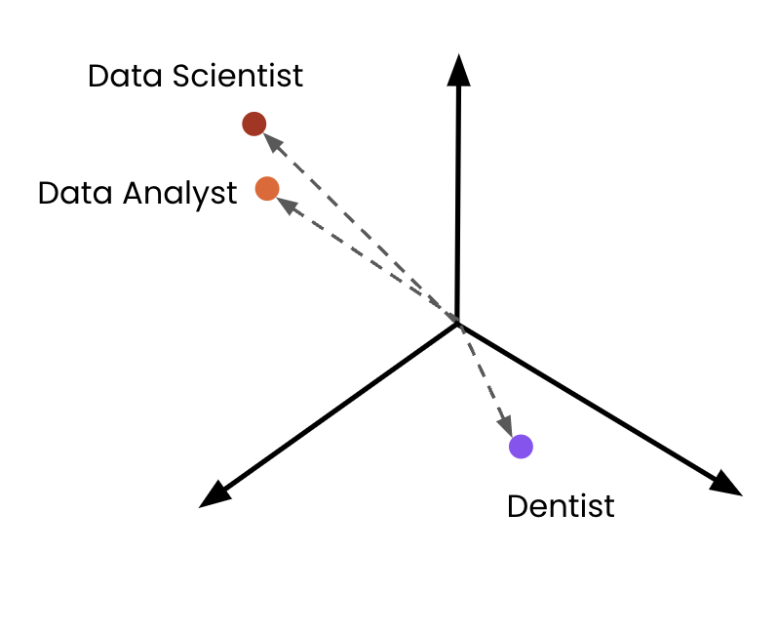

### Classification
Classification tasks:
- Classify sentiment
- Cluster observations
- Categorization
- Example: **Classifying news headlines**
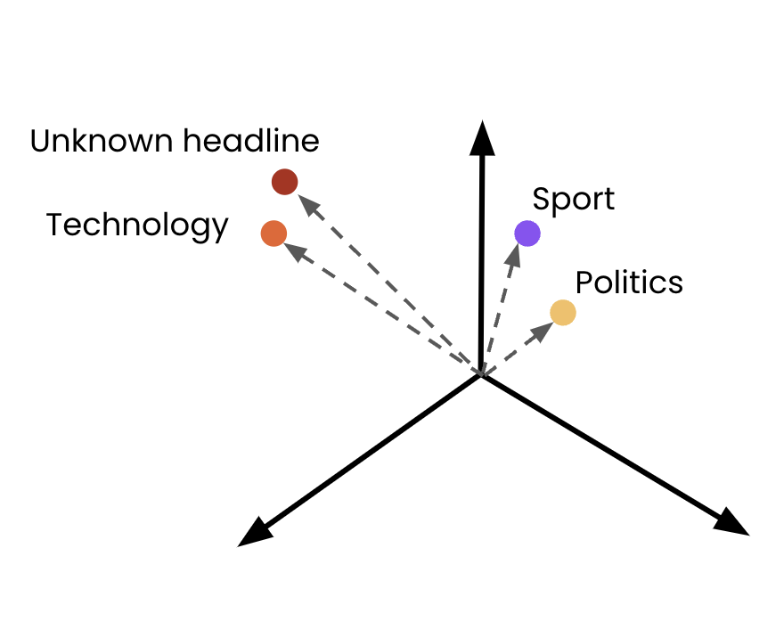

### Creating an Embeddings request
Embeddings endpoint

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="<OPENAI_API_KEY>")
response = client.embeddings.create( 
    model="text-embedding-3-small",
    input="""Embeddings are a numerical representation of text that can be used to measure the relatedness between 
    two pieces of text."""
)

response_dict = response.model_dump()
print(response_dict)

### Embeddings response
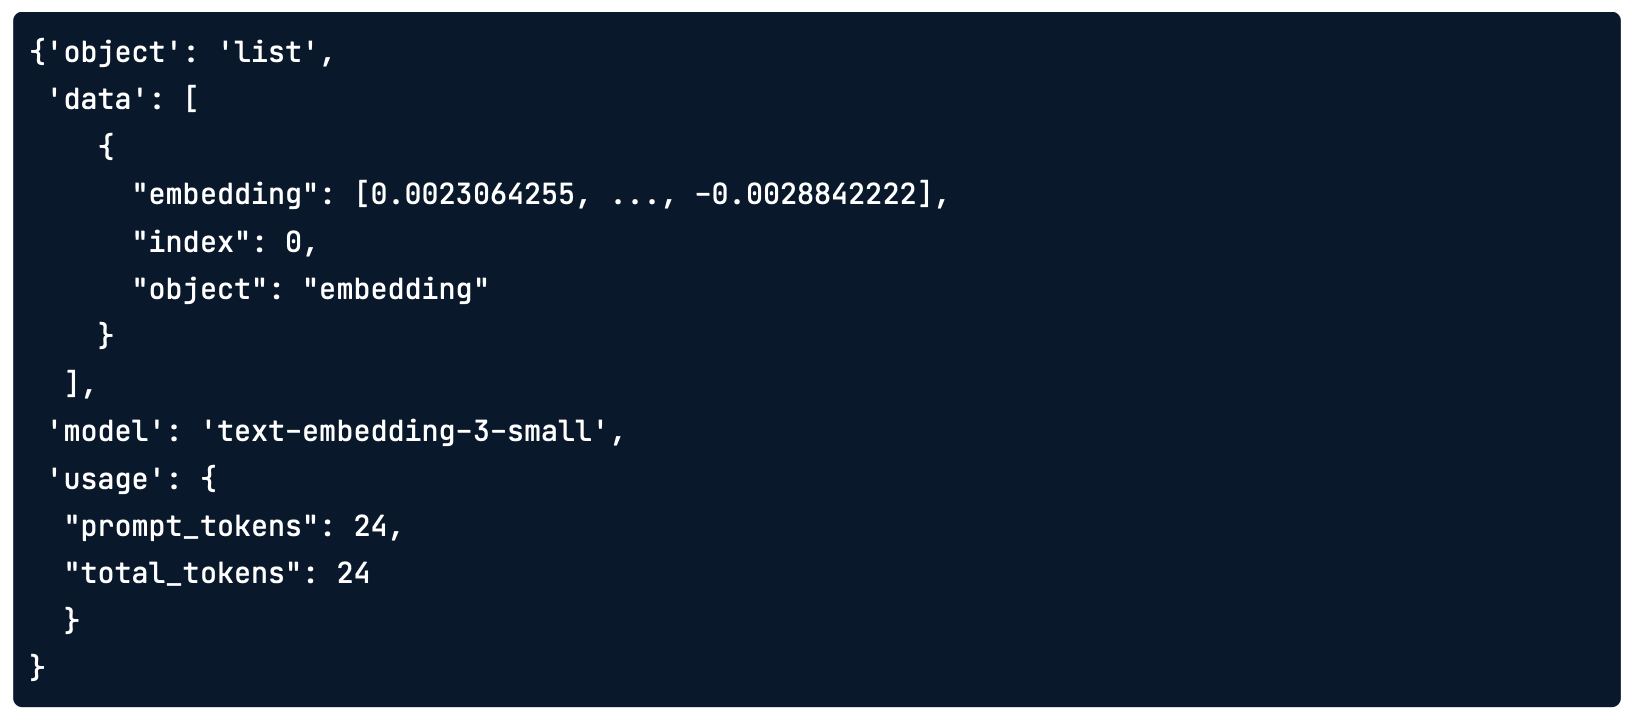

### Extracting the embeddings

In [ ]:
print(response_dict['data'][0]['embedding'])

# Output: [0.0023064255, ...., -0.0028842222]

In [ ]:
# Practice 1

# Create an OpenAI client
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to obtain embeddings
response = client.embeddings.create(
    model="text-embedding-3-small",
    input="""Today, I learned the concept of embeddings, its uses cases, how it works, and its importance in building impactful 
    AI systems. Next up, vector databases and RAG."""
)

# Convert the response into a dictionary
response_dict = response.model_dump()
print(response_dict)

In [ ]:
# Practice 2

# Extract the total_tokens from response_dict
print(response_dict['usage']['total_tokens'])

# Extract the embeddings from response_dict
print(response_dict['data'][0]['embedding'])

## Investigating the Vector Space

### Example: Embedding headlines

In [ ]:
articles = [  
    {"headline": "Economic Growth Continues Amid Global Uncertainty", "topic": "Business"},  
    {"headline": "Interest rates fall to historic lows", "topic": "Business"},  
    {"headline": "Scientists Make Breakthrough Discovery in Renewable Energy", "topic": "Science"},   
    {"headline": "India Successfully Lands Near Moon's South Pole", "topic": "Science"},  
    {"headline": "New Particle Discovered at CERN", "topic": "Science"}, 
    {"headline": "Tech Company Launches Innovative Product to Improve Online Accessibility", "topic": "Tech"},    
    {"headline": "Tech Giant Buys 49% Stake In AI Startup", "topic": "Tech"},  
    {"headline": "New Social Media Platform Has Everyone Talking!", "topic": "Tech"},  
    {"headline": "The Blues get promoted on the final day of the season!", "topic": "Sport"}, 
    {"headline": "1.5 Billion Tune-in to the World Cup Final", "topic": "Sport"}
]